                                                                            CV LAB 3

Authors: Neelanjan Mukherji and Michel Akpro

Date: January 30th, 2024

Professor: Brian Gray

Course: Computer Vision - 24W_ROB8705_010


The purpose of this lab was to perform morphological operations on a set image to showcase morphological operations in image processing. The second part of the lab will take all the steps discussed in the first step, and apply them to a custom image to aid in edge detection. 

First, we start off with importing any necessary libraries. 

In [67]:

import cv2 
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

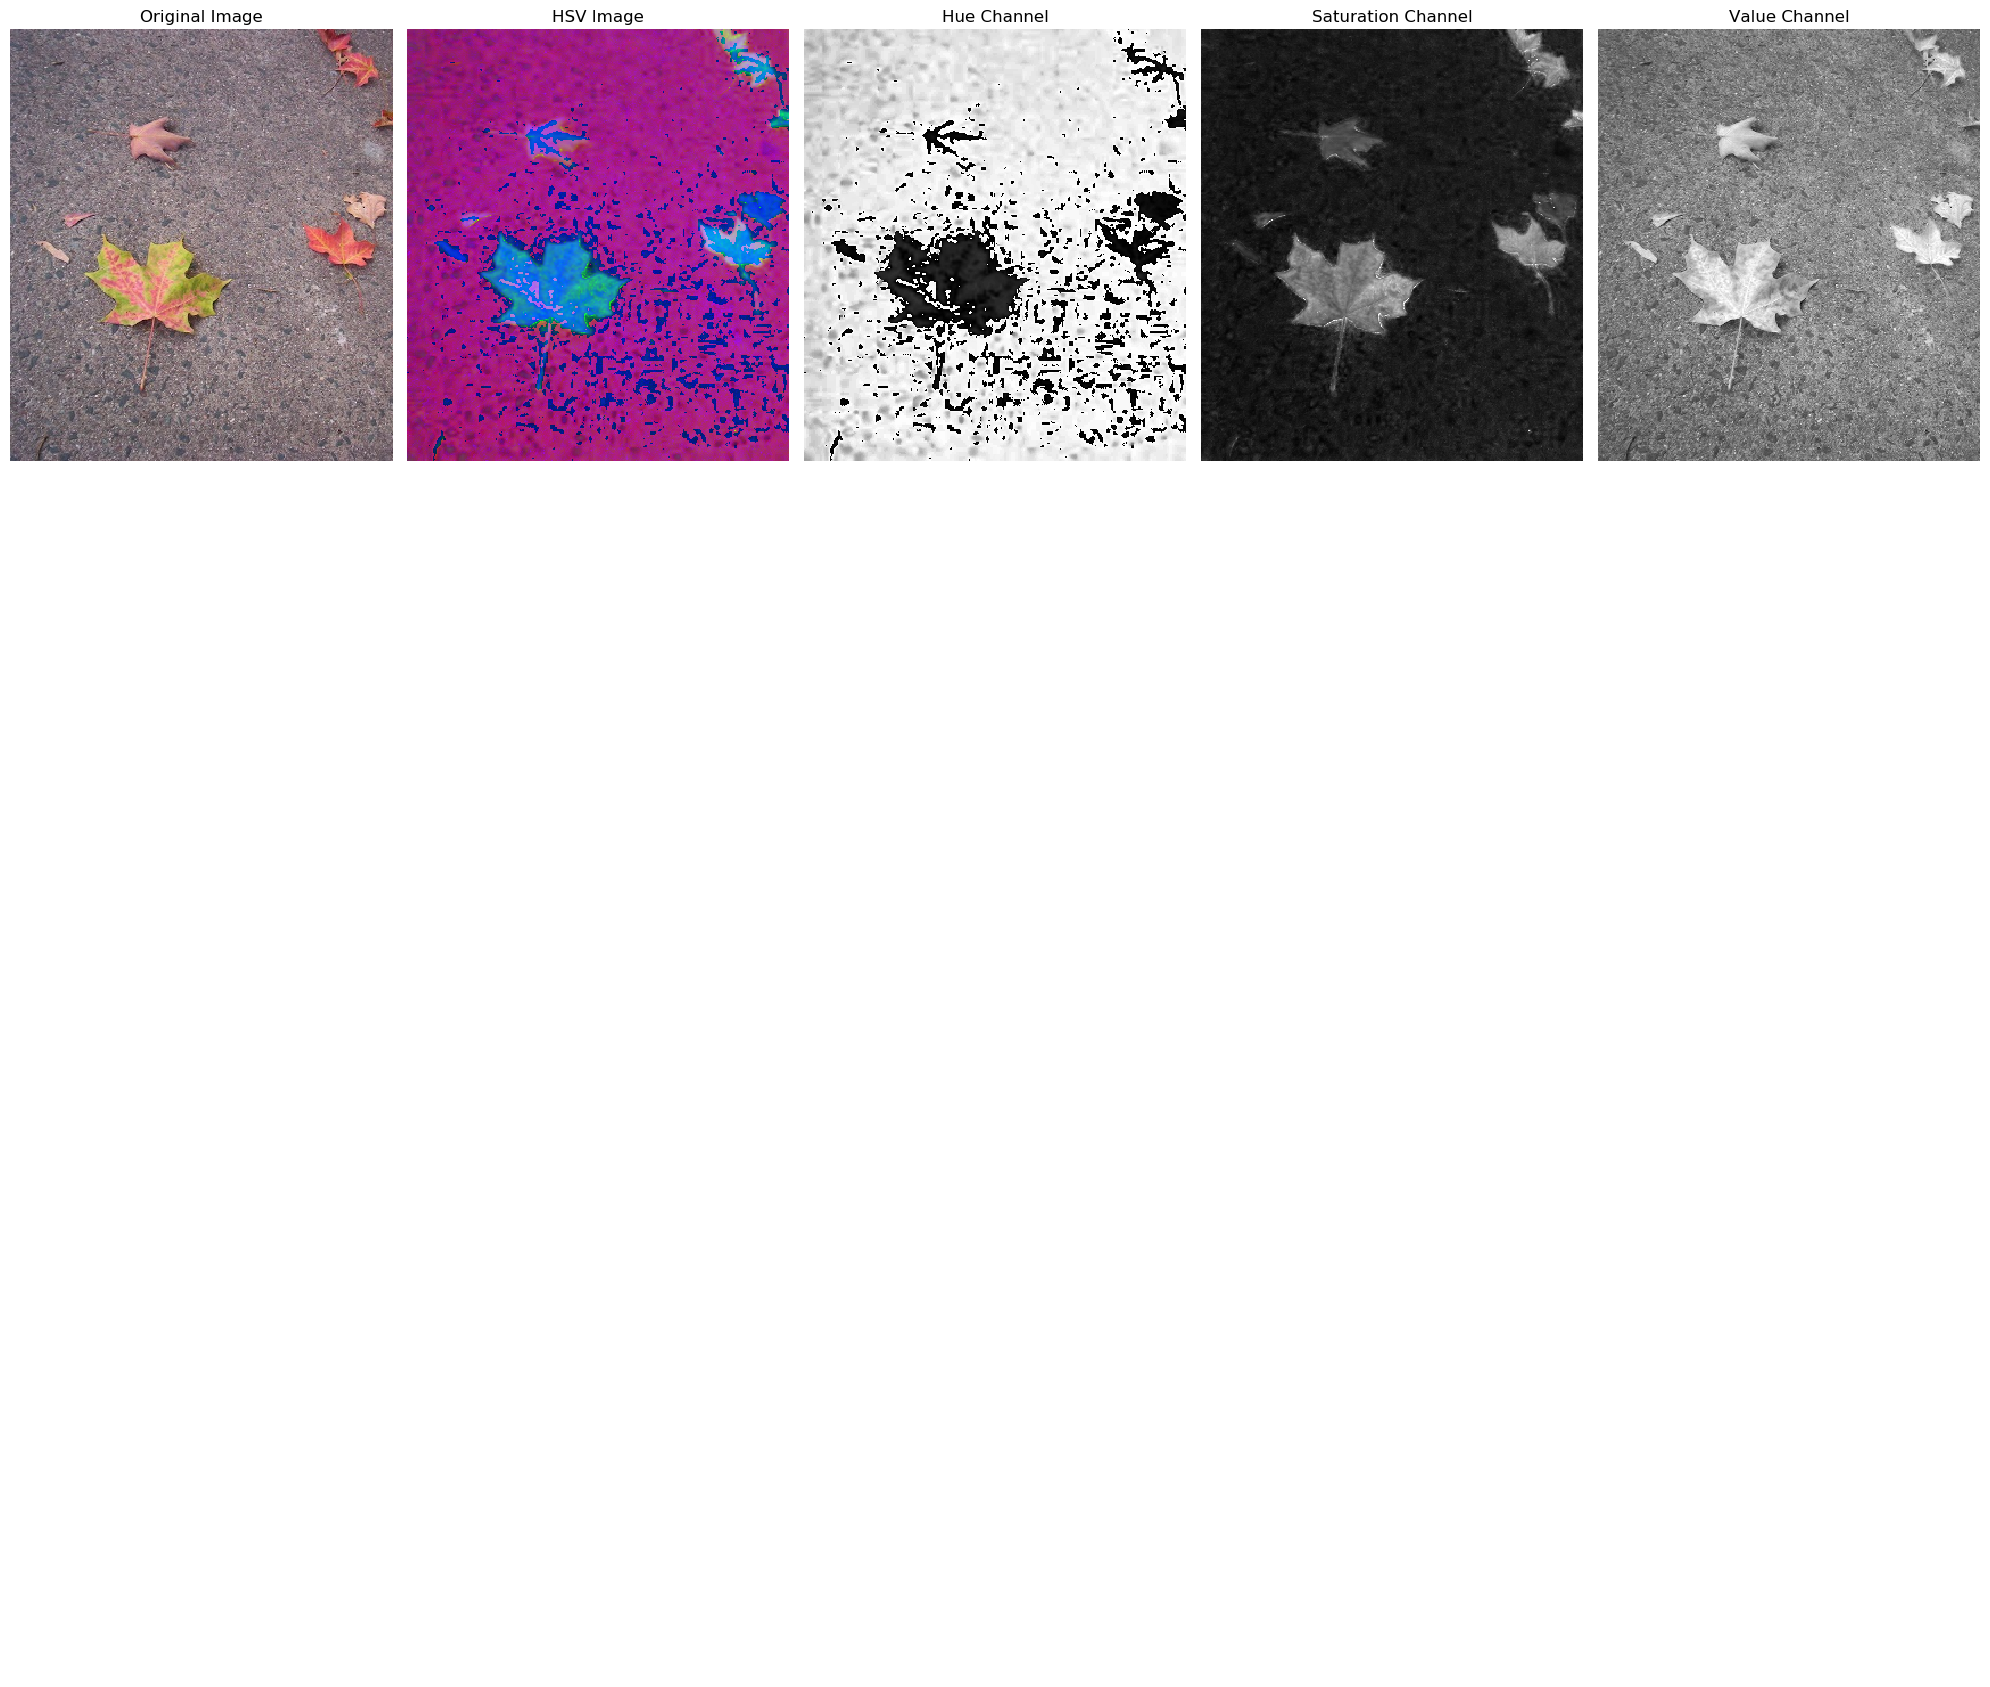

In [68]:
img = cv2.imread('leaves.jpg')

cv2.imshow("image Leaves ", img)

imgHSV= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHue = imgHSV[:, :, 0]
imgSat = imgHSV[:, :, 1]
imgVal= imgHSV[:, :, 2]

fig, axes = plt.subplots(2, 5, figsize=(20, 20))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')

# HSV Image
axes[0, 1].imshow(imgHSV, cmap='hsv')
axes[0, 1].set_title('HSV Image')

# Hue Channel
axes[0, 2].imshow(imgHue, cmap='gray')
axes[0, 2].set_title('Hue Channel')

# Saturation Channel
axes[0, 3].imshow(imgSat, cmap='gray')
axes[0, 3].set_title('Saturation Channel')

# Value Channel
# Normalize the Value channel to be between 0 and 1
imgVal_normalized = imgVal / 255.0
axes[0, 4].imshow(imgVal_normalized, cmap='gray')
axes[0, 4].set_title('Value Channel')

# Remove axis labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


With the image read and converted to HSV format, the next step is to apply a mask of threshold values. 

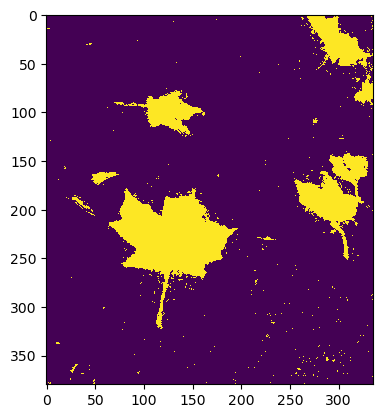

In [69]:
ret, mask = cv2.threshold(imgSat, 50, 180,cv2.THRESH_BINARY)
plt.imshow( mask)


From comparing the hue saturation and intensity value elements, intensity value held the most promise in being able to isolate the leaves from the background and capture all the loose leaf fragments on the ground.

The next step is to create a structured element to use for erosion and dilation to perform morphology. This is done using the getStructuringElement functiion found in the openCV libraries.


[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

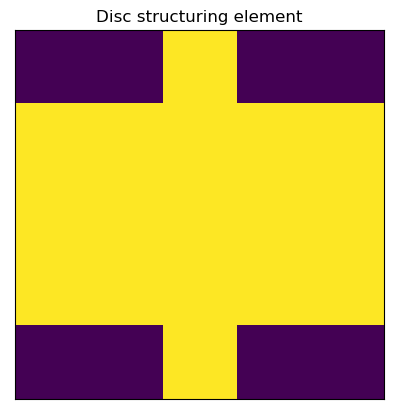

In [70]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print(disc)
fig = plt.figure();
plt.subplot(111), plt.imshow(disc), plt.title("Disc structuring element")
plt.xticks([]), plt.yticks([])


From here we perform Erosion.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

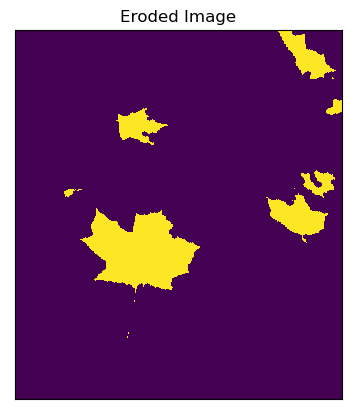

In [71]:
eroded = cv2.erode(mask, disc)
plt.imshow(eroded), plt.title("Eroded Image")
plt.xticks([]), plt.yticks([])



With Erosion now performed, it can be seen that most of the remaining noise has been filtered from the masked binary image. Now let's observe the effects of dilation on the same masked binary image. The code below performs image dilation.


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

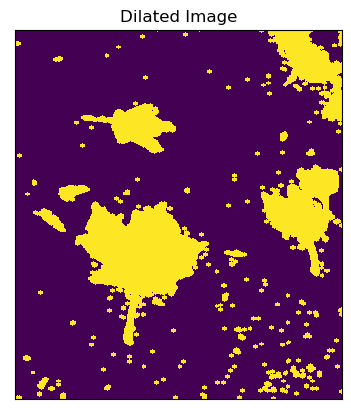

In [72]:
dilated = cv2.dilate(mask, disc)
plt.imshow(dilated), plt.title("Dilated Image")
plt.xticks([]), plt.yticks([])



Now that we've explored dilation and erosion on a masked image, let's explore opening...We use the openCV functions to perform this. As opening involves eroding an image to remove white noise, and then dilating the eroded image to increase the object area, the previous eroded image will be dilated using the same structured element. This will be done in two ways:

Approach #1: Take eroded image already defined above, and dilate the image using the same disc shaped structured element.

Approach #2: Take original mask image, and feed that into the morphologyEx() function available in the openCV library.

Let's take a look at approach #1...


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

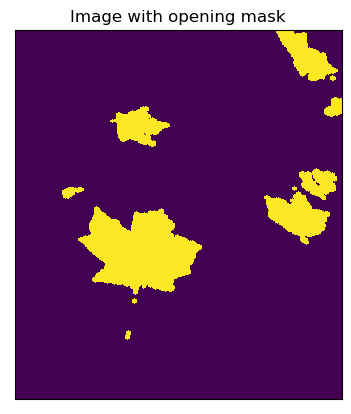

In [73]:
opening_manual = cv2.dilate(eroded, disc)
plt.imshow(opening_manual), plt.title("Image with opening mask")
plt.xticks([]), plt.yticks([])

Inversely, the closing mask could be performed by taking the dilated image and eroding it as shown below...

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

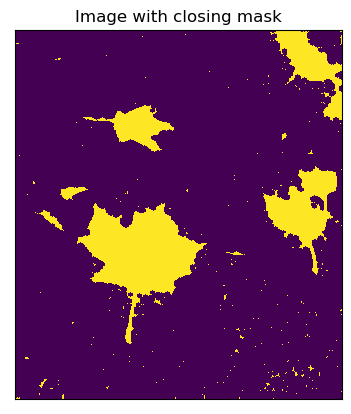

In [74]:
closing_manual = cv2.erode(dilated, disc)
plt.imshow(closing_manual), plt.title("Image with closing mask")
plt.xticks([]), plt.yticks([])



It can be seen that the process of opening involves removing white noise, and then applying dilation to fill in the gaps where there were dense areas of intensity values. Inversely, the process of closing also yielded impressive results by applying dilation first on the masked image to increase the object area, and then eroding the dilated image to remove as much white noise as possible. It can be seen that in terms of filtering out the leaves from the background, the process of opening yielded more promising results. But by applying closing, certain details of the leaves were captured that were otherwise lost in the process of eroding. Like the stem of the leaf for example.


Approach #2

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

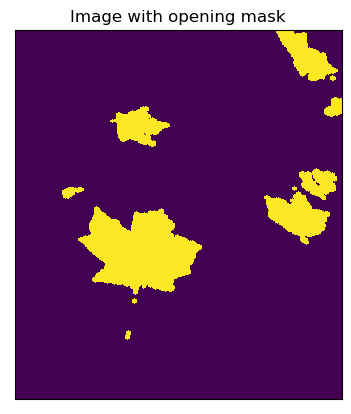

In [75]:
opening_auto = cv2.morphologyEx(mask, cv2.MORPH_OPEN, disc)
plt.imshow(opening_auto), plt.title("Image with opening mask")
plt.xticks([]), plt.yticks([])



Repeating the process but for closing...


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

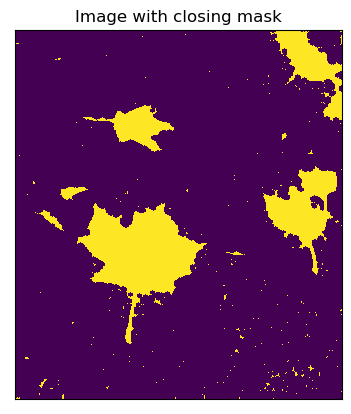

In [76]:
closing_auto = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, disc)
plt.imshow(closing_auto), plt.title("Image with closing mask")
plt.xticks([]), plt.yticks([])

Comparing all the morphological operations in chronological order, the outputs are shown below. 

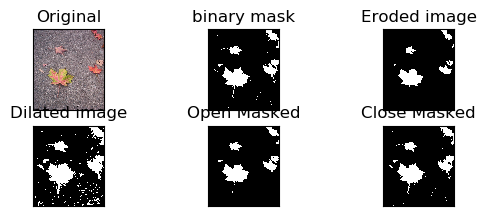

In [77]:
plt.subplot(431), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(432), plt.imshow(mask, cmap = plt.cm.gray), plt.title("binary mask")
plt.xticks([]), plt.yticks([])
plt.subplot(433), plt.imshow(eroded, cmap = plt.cm.gray), plt.title("Eroded image")
plt.xticks([]), plt.yticks([])
plt.subplot(434), plt.imshow(dilated, cmap = plt.cm.gray), plt.title("Dilated image")
plt.xticks([]), plt.yticks([])
plt.subplot(435), plt.imshow(opening_manual, cmap = plt.cm.gray), plt.title("Open Masked")
plt.xticks([]), plt.yticks([])
plt.subplot(436), plt.imshow(closing_manual, cmap = plt.cm.gray), plt.title("Close Masked")
plt.xticks([]), plt.yticks([])
plt.show()

The final part of this exercise was to apply segmentation to image using the binary mask defined previously. This effort is applied to the R, G, and B channels of the image. 


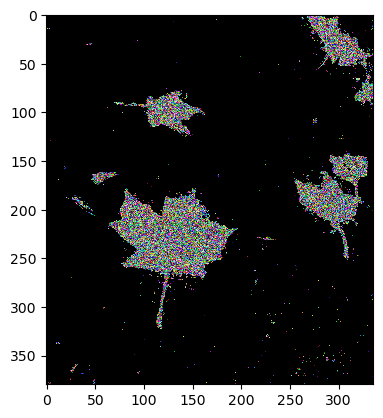

In [85]:
mask.dtype = 'uint8'
imgSegment = img
imgSegment[:,:,0] = img[:,:,0]*mask
imgSegment[:,:,1] = img[:,:,1]*mask
imgSegment[:,:,2] = img[:,:,2]*mask

plt.imshow(imgSegment)


=========================================================PART2===================

In this part, an image was chosen that is then converted to HSV format, masked into a binary image, and has dilation and/or erosion, or both performed to extract a specified feature of the photo. The photo in question is the image below. 

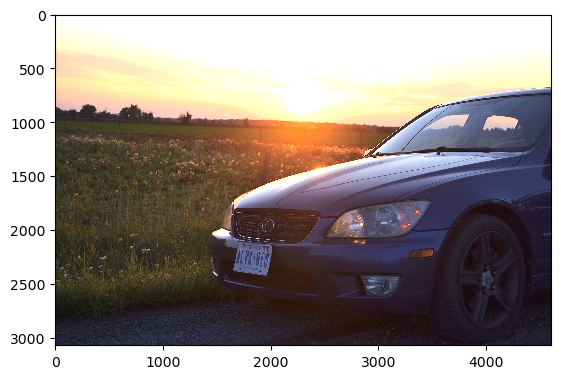

In [78]:
lexi = cv2.imread('is300.jpg')
plt.imshow(cv2.cvtColor(lexi, cv2.COLOR_BGR2RGB))

Now we convert image to HSV and compare the outputs. 


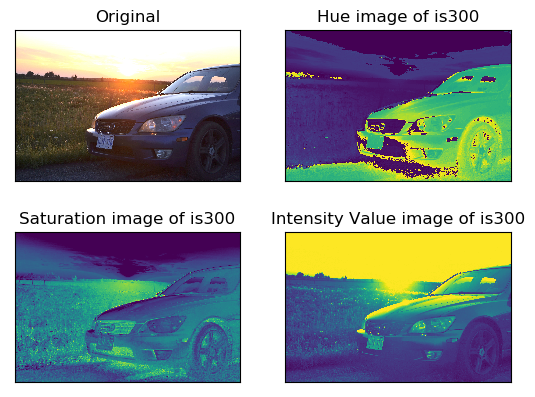

In [79]:
imgHSV2= cv2.cvtColor(lexi, cv2.COLOR_BGR2HSV)
imgHue2= imgHSV2[:, :, 0]
imgSat2 = imgHSV2[:, :, 1]
imgVal2= imgHSV2[:, :, 2]

plt.subplot(221), plt.imshow(cv2.cvtColor(lexi, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imgHue2), plt.title("Hue image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imgSat2), plt.title("Saturation image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(imgVal2), plt.title("Intensity Value image of is300")
plt.xticks([]), plt.yticks([])
plt.show()


Convert the HSV channels to grayscale.

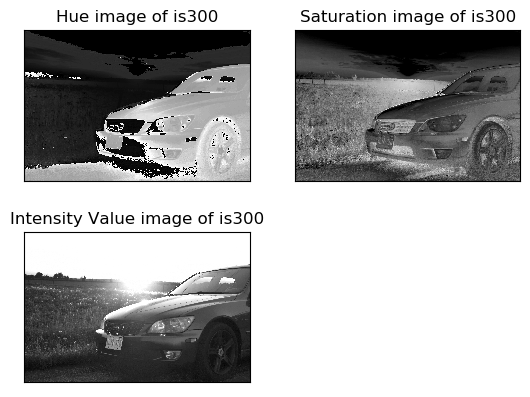

In [80]:
#Convert the HSV images to gray 
plt.subplot(221), plt.imshow(imgHue2, cmap = plt.cm.gray), plt.title("Hue image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(imgSat2, cmap = plt.cm.gray), plt.title("Saturation image of is300")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(imgVal2, cmap = plt.cm.gray), plt.title("Intensity Value image of is300")
plt.xticks([]), plt.yticks([])
plt.show()

With the HSV image channels converted to gray scale, the next step in applying morphology to this image involves turning our image of choice (saturated image) into a binary image as shown below. 

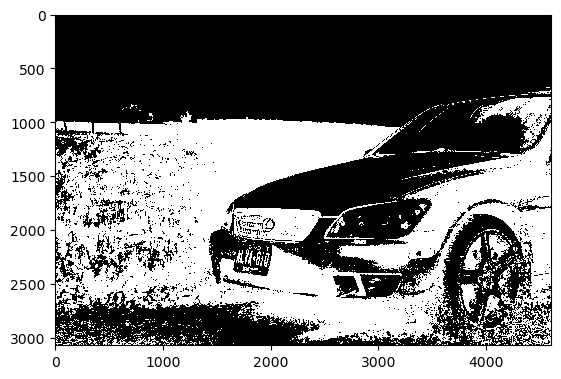

In [81]:

binret, Bimg = cv2.threshold(imgSat2, 90, 170,cv2.THRESH_BINARY)
disc2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

plt.imshow( Bimg, cmap = plt.cm.gray)


With the binary image shown above, the next step was to apply additional morphological operations such as open masking the image. This process was performed by first eroding the image to elimate white noise, and then dilating the image to emphasize the object area. Once morphological operations were performed, edge detection was performed without using the Canny functionalities by taking the absolute difference between the binary image, and the opening masked image. This image yields the edges of the vehicle. 

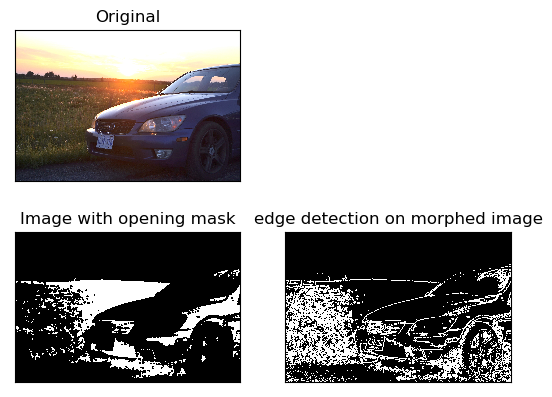

In [83]:
# adding the SE for our erosion, and erode for n number of iterations 
eroded_image = cv2.erode(Bimg, disc2, iterations=9)

#dilating the eroded image to perform a opening mask
dilated_lexi = cv2.dilate(eroded_image, disc2)


# show the binary image to delete the open masked image from the original binary img created
edgydetection = cv2.absdiff(Bimg, dilated_lexi) # deleting the erroded binary from the original

plt.subplot(221), plt.imshow(cv2.cvtColor(lexi, cv2.COLOR_BGR2RGB)), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(dilated_lexi, cmap = plt.cm.gray), plt.title("Image with opening mask")
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(edgydetection, cmap = plt.cm.gray), plt.title("edge detection on morphed image")
plt.xticks([]), plt.yticks([])
plt.show()

It can be seen from the above plots that by applying morphological operations, edge detection was performed with relative ease and distinct contour lines were observed in the image clearly indicating the vehicle structure. 

In [84]:
#waits for user to press a key
cv2.waitKey(0)
cv2.destroyAllWindows()

REFERENCES


[1] “Morphological transformations,” OpenCV, https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html (accessed Jan. 30, 2024). 

[2] Gradient-based Edge Detection - Stanford University, https://web.stanford.edu/class/ee368/Handouts/Lectures/2013_Autumn/9-Edge-Detection/Gradient_Based_Edge_Detectors.pdf (accessed Jan. 31, 2024). 